# Prelims

In [1]:
# -----------------MAGIC COMMANDS---------------
#################################################################
### magic commands to enable autoreload for imported packages ###
#################################################################
%load_ext autoreload
%autoreload 2
%matplotlib inline

# -------------------IMPORTS---------------------
###################    
### basic stuff ###
###################
    
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..')) # setting parent_dir in sys.path
sys.path.insert(0, parent_dir) # so that tennis_main can be found as a module

############################################
### project specific classes and methods ###
############################################

from tennis_main.data import Tennis
from tennis_main.data_preprocessing import Tennis_preprocessing # preprocessing methods based on the MVP - SHOULD BE UPDATED FOR PLAYER STATS
from tennis_main.player_stats import Player 

###############################
### basic data manipulation ###
###############################

import pandas as pd
import numpy as np
# import ydata_profiling # basic EDA package

###########
### viz ###
###########

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import plotly.express as px
from statsmodels.graphics.gofplots import qqplot # quantile-quantile plot for gaussianity check

################################
### ML libraries and modules ###
################################

# data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

# model evaluation
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, learning_curve
from sklearn.inspection import permutation_importance

# feature evaluation
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

# model
from sklearn.linear_model import LogisticRegression

# Data

## Singles "raw" data

In [2]:
singles = Tennis().get_singles()

In [3]:
singles_2010 = singles[2010]
singles_2011 = singles[2011]
singles_2012 = singles[2012]

In [4]:
singles_3 = pd.concat([singles_2010, singles_2011, singles_2012]).reset_index().drop(columns = "index")

In [6]:
singles_2010.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [10]:
singles_2010[['tourney_date', 'match_num', 'winner_id', 'loser_id', 'score','w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced']]
# , 

,tourney_date,match_num,winner_id,loser_id,score,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced
0,20100103,1,104053,103429,7-6(5) 6-2,15.0,0.0,63.0,42.0,36.0,14.0,10.0,3.0,3.0
1,20100103,2,104958,104999,7-5 6-1,10.0,3.0,57.0,30.0,23.0,19.0,10.0,0.0,0.0
2,20100103,3,104755,103813,6-3 4-6 6-4,5.0,4.0,97.0,51.0,33.0,27.0,15.0,5.0,8.0
3,20100103,4,105051,103781,7-5 6-1,12.0,1.0,50.0,35.0,30.0,12.0,10.0,3.0,3.0
4,20100103,5,104607,105194,6-2 6-4,3.0,1.0,46.0,27.0,24.0,14.0,9.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,20101203,4,104925,104792,6-2 6-2 6-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3026,20101203,5,104678,103566,6-2 6-2 6-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3027,20100516,291,104724,103908,3-6 6-3 6-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3028,20100516,285,103908,105583,6-2 6-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
singles_2010[['tourney_date', 'match_num', 'winner_id', 'loser_id', 'score','l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced']]

,tourney_date,match_num,winner_id,loser_id,score,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,20100103,1,104053,103429,7-6(5) 6-2,4.0,2.0,56.0,34.0,29.0,11.0,10.0,3.0,5.0
1,20100103,2,104958,104999,7-5 6-1,2.0,2.0,66.0,34.0,22.0,14.0,9.0,7.0,10.0
2,20100103,3,104755,103813,6-3 4-6 6-4,4.0,0.0,85.0,58.0,38.0,14.0,14.0,7.0,11.0
3,20100103,4,105051,103781,7-5 6-1,2.0,1.0,53.0,29.0,16.0,15.0,9.0,2.0,5.0
4,20100103,5,104607,105194,6-2 6-4,6.0,1.0,69.0,41.0,26.0,14.0,9.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025,20101203,4,104925,104792,6-2 6-2 6-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3026,20101203,5,104678,103566,6-2 6-2 6-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3027,20100516,291,104724,103908,3-6 6-3 6-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3028,20100516,285,103908,105583,6-2 6-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Integrating Player Stats into the singles data under study

Creating a csv from the parquet file that includes all the player stats.

In [5]:
def merge_singles_and_players(df):
    """
    A method that takes a dataframe as input and merges with the corresponding
    rows from the master player statistics parquet file.
    """
    # creating player_stats dataframe
    player_stats = pd.read_parquet("../processed_data/tennis_atp/singles/master_player_features.parquet", engine="pyarrow")
    player_stats.to_csv("Player_stats.csv", index=False)
    player_stats = pd.read_csv("Player_stats.csv")

    # merging with passed singles' dataframe
    working_df = df.merge(player_stats, how = "left", on = ["tourney_id", "match_num"])
    working_df = working_df.drop(columns = ["tourney_date_x", "surface_x"]).rename(columns={'tourney_date_y': 'tourney_date', "surface_y" : "surface"})

    return working_df

In [6]:
working_df = merge_singles_and_players(singles_3)

In [7]:
# player_stats = pd.read_parquet("../processed_data/master_player_features.parquet", engine="pyarrow")
# player_stats.to_csv("Player_stats.csv", index=False)
# player_stats = pd.read_csv("Player_stats.csv")
# player_stats.columns

In [8]:
# working_df = singles_2010.merge(player_stats, how = "left", on = ["tourney_id", "match_num"])

## Converting corresponding columns into winner and loser columns for each row

In [9]:
feature_list = [feat for feat in list(working_df.columns) if feat.startswith("career") and not (feat.endswith("carpet")\
               or feat.endswith("clay") or feat.endswith("grass") or feat.endswith("hard") or feat.endswith("180D"))]

for feat in feature_list:
    winner_mask = working_df['winner_id'] == working_df['player_id']
    loser_mask = working_df['loser_id'] == working_df['player_id']
    
    winner_data = working_df[winner_mask].copy() 
    winner_data['surface_feat'] = winner_data.apply(lambda row: row[f"{feat}_{row['surface'].lower()}"], axis=1)
    
    winner_feat = winner_data[["tourney_id", "match_num", feat, 'surface_feat']].rename(columns={feat: f"winner_{feat}", 'surface_feat': f"winner_{feat}_surface"})

In [10]:
def all_stats_per_match(combined_df):
    """
    Method that takes all stats corresponding to a single game, which take up 2 different
    rows in the passed dataframe and combines them, so that each row includes all the data 
    for a single match.

    The stats included in each row are the whole career version for each player, as well as
    its surface speciic counterpart.

    Returns a dataframe that is otherwise ready to be preprocessed and fed to a model.
    """

    combined_df = combined_df.copy()
    
    feature_list = [feat for feat in list(working_df.columns) if feat.startswith("career") and not (feat.endswith("carpet")\
               or feat.endswith("clay") or feat.endswith("grass") or feat.endswith("hard") or feat.endswith("180D"))]

    winner_mask = combined_df['winner_id'] == combined_df['player_id']
    loser_mask = combined_df['loser_id'] == combined_df['player_id']

    i = 0
    
    for feat in feature_list:
        # winner
        winner_data = combined_df[winner_mask].copy() 
        winner_data['surface_feat'] = winner_data.apply(
            lambda row: row[f"{feat}_{row['surface'].lower()}"], axis=1)
        winner_feat = winner_data[["tourney_id", "match_num", feat, 'surface_feat']].rename(
            columns={feat: f"winner_{feat}", 'surface_feat': f"winner_{feat}_surface"})

        # loser
        loser_data = combined_df[loser_mask].copy()
        loser_data['surface_feat'] = loser_data.apply(
            lambda row: row[f"{feat}_{row['surface'].lower()}"], axis=1)
        loser_feat = loser_data[["tourney_id", "match_num", feat, 'surface_feat']].rename(
            columns={feat: f"loser_{feat}", 'surface_feat': f"loser_{feat}_surface"})
        

        if i == 0:
            base_df = combined_df.drop_duplicates(subset = ["tourney_id", "match_num"])
            i += 1
        
        base_df = base_df.merge(winner_feat, on = ["tourney_id", "match_num"], how = 'left') \
                      .merge(loser_feat, on = ["tourney_id", "match_num"], how = 'left')

    
    
    return base_df

In [11]:
full_df = all_stats_per_match(working_df)

In [12]:
COLS_TO_DROP = ['tourney_name','draw_size', 'tourney_level','winner_seed', 'winner_entry', 'winner_name', 'winner_ioc',
                'loser_seed', 'loser_entry', 'loser_name', 'loser_ioc', 'score', 'best_of', 'round', 'minutes', 'w_ace',
                'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
                'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced','career_cumul_aces',
                'career_cumul_aces_clay', 'career_cumul_aces_grass', 'career_cumul_aces_hard', 'career_cumul_aces_carpet',
                'career_cumul_1st_in', 'career_cumul_1st_in_clay', 'career_cumul_1st_in_grass', 'career_cumul_1st_in_hard',
                'career_cumul_1st_in_carpet', 'career_cumul_1st_won', 'career_cumul_1st_won_clay', 'career_cumul_1st_won_grass',
                'career_cumul_1st_won_hard', 'career_cumul_1st_won_carpet', 'career_cumul_2nd_won', 'career_cumul_2nd_won_clay',
                'career_cumul_2nd_won_grass', 'career_cumul_2nd_won_hard', 'career_cumul_2nd_won_carpet', 'career_cumul_df',
                'career_cumul_df_clay', 'career_cumul_df_grass', 'career_cumul_df_hard', 'career_cumul_df_carpet', 'career_cumul_svpt',
                'career_cumul_svpt_clay', 'career_cumul_svpt_grass', 'career_cumul_svpt_hard', 'career_cumul_svpt_carpet',
                'career_cumul_bp_faced', 'career_cumul_bp_faced_clay', 'career_cumul_bp_faced_grass', 'career_cumul_bp_faced_hard', 
                'career_cumul_bp_faced_carpet', 'career_cumul_bp_saved', 'career_cumul_bp_saved_clay', 'career_cumul_bp_saved_grass',
                'career_cumul_bp_saved_hard', 'career_cumul_bp_saved_carpet', 'career_cumul_served_games', 'career_cumul_served_games_clay',
                'career_cumul_served_games_grass', 'career_cumul_served_games_hard', 'career_cumul_served_games_carpet', 'career_cumul_matches_played',
                'career_cumul_matches_played_clay', 'career_cumul_matches_played_grass', 'career_cumul_matches_played_hard',
                'career_cumul_matches_played_carpet', 'career_cumul_wins', 'career_cumul_win_ratio', 'career_cumul_wins_clay',
                'career_cumul_win_ratio_clay', 'career_cumul_wins_grass', 'career_cumul_win_ratio_grass', 'career_cumul_wins_hard',
                'career_cumul_win_ratio_hard', 'career_cumul_wins_carpet', 'career_cumul_win_ratio_carpet', 'career_aces_p_match',
                'career_aces_p_match_clay', 'career_aces_p_match_grass', 'career_aces_p_match_hard', 'career_aces_p_match_carpet',
                'career_df_p_match', 'career_df_p_match_clay', 'career_df_p_match_grass', 'career_df_p_match_hard', 'career_df_p_match_carpet',
                'career_svpt_p_match', 'career_svpt_p_match_clay', 'career_svpt_p_match_grass', 'career_svpt_p_match_hard',
                'career_svpt_p_match_carpet', 'career_1st_in_p_match', 'career_1st_in_p_match_clay', 'career_1st_in_p_match_grass',
                'career_1st_in_p_match_hard', 'career_1st_in_p_match_carpet', 'career_1st_won_p_match', 'career_1st_won_p_match_clay',
                'career_1st_won_p_match_grass', 'career_1st_won_p_match_hard', 'career_1st_won_p_match_carpet', 'career_2nd_won_p_match',
                'career_2nd_won_p_match_clay', 'career_2nd_won_p_match_grass', 'career_2nd_won_p_match_hard', 'career_2nd_won_p_match_carpet',
                'career_served_games_p_match', 'career_served_games_p_match_clay', 'career_served_games_p_match_grass',
                'career_served_games_p_match_hard', 'career_served_games_p_match_carpet', 'career_bp_faced_p_match', 'career_bp_faced_p_match_clay',
                'career_bp_faced_p_match_grass', 'career_bp_faced_p_match_hard', 'career_bp_faced_p_match_carpet', 'career_bp_saved_p_match',
                'career_bp_saved_p_match_clay', 'career_bp_saved_p_match_grass', 'career_bp_saved_p_match_hard', 'career_bp_saved_p_match_carpet',
                'career_match_ace_roll_sum_15_180D', 'career_match_ace_roll_avg_15_180D', 'career_match_df_roll_sum_15_180D',
                'career_match_df_roll_avg_15_180D', 'career_match_svpt_roll_sum_15_180D', 'career_match_svpt_roll_avg_15_180D',
                'career_match_1stIn_roll_sum_15_180D', 'career_match_1stIn_roll_avg_15_180D', 'career_match_1stWon_roll_sum_15_180D',
                'career_match_1stWon_roll_avg_15_180D', 'career_match_2ndWon_roll_sum_15_180D', 'career_match_2ndWon_roll_avg_15_180D',
                'career_match_SvGms_roll_sum_15_180D', 'career_match_SvGms_roll_avg_15_180D', 'career_match_bpSaved_roll_sum_15_180D',
                'career_match_bpSaved_roll_avg_15_180D', 'career_match_bpFaced_roll_sum_15_180D', 'career_match_bpFaced_roll_avg_15_180D',
                'player_id']

def clean_player_statistics(df, cols = COLS_TO_DROP):
    """
    Method that drops all columns that we a priori know will not be fed to the model.
    They are mostly columns that are aggregated for career wide statistics, as well as
    some columns that are irrelevant to the model's performance.

    Also, it cleans up the names of the remaining columns for later ease.
    
    Its input is a dataframe that contains all relevant player statistics up to that point.
    """

    df = df.copy()

    # dropping useless columns
    df = df.drop(columns = COLS_TO_DROP)

    # renaming to tidy up names
    col_names_new = [col.replace("winner_career_cumul", "w") if col.startswith("winner_career_cumul") else
                     col.replace("winner_career", "w") if col.startswith("winner_career") else
                     col.replace("winner", "w") if col.startswith("winner") else
                     col.replace("loser_career_cumul", "l") if col.startswith("loser_career_cumul") else
                     col.replace("loser_career", "l") if col.startswith("loser_career") else
                     col.replace("loser", "l") if col.startswith("loser") else
                     col for col in df.columns.to_list()]
    
    df.columns = col_names_new
        
    return df

In [13]:
clean_df = clean_player_statistics(full_df)

# Preprocessing

## View of Data

### Dropping duplicates

In [14]:
def duplicates(df):
    """
    Method that takes dataframe as input and drops all duplicate rows.
    This must have been taken care of earlier, however we do it again to prevent 
    any data leakage.
    """
    
    df = df.copy()

    return df.drop_duplicates()

### Imputing missing values

In [15]:
def missing_values(df):
    """
    Method that deals with missing values.
    - Imputes height, age using the median.
    - Imputes rank for unranked players and rank points with 0.
    """
    df = df.copy()
    
    ##################################
    # imputing player_ht, player_age #
    ##################################

    # instantiating imputer
    height_age_imputer = SimpleImputer(strategy = "median", keep_empty_features = True)

    # fitting and transforming
    df["w_ht"], df["l_ht"] = height_age_imputer.fit_transform(df[["w_ht", "l_ht"]]).T
    df["w_age"], df["l_age"] = height_age_imputer.fit_transform(df[["w_age", "l_age"]]).T

    ###########################################################################################
    # filling player_rank with a rank that is greater than the greatest rank in the dataframe #
    ###########################################################################################

    length = len(df)
    
    not_ranked_win = pd.DataFrame(df)["w_rank"].isna().sum()
    not_ranked_los = pd.DataFrame(df)["l_rank"].isna().sum()

    li_win = []
    li_los = []
    
    if not_ranked_win != 0:
        li_win = np.arange(length - not_ranked_win + 1, length + 1).tolist()
    if not_ranked_los != 0:
        li_los = np.arange(length - not_ranked_los + 1, length + 1).tolist()

    li = li_win + li_los
    np.random.shuffle(li)

    df.loc[:,"w_rank"] = df["w_rank"].apply(lambda row: li.pop() if pd.isna(row) else row)
    df.loc[:,"l_rank"] = df["l_rank"].apply(lambda row: li.pop() if pd.isna(row) else row)

    ##############################################
    # filling unranked player rank points with 0 #
    ##############################################

    # instantiating imputer
    rank_point_imputer = SimpleImputer(strategy = "constant", fill_value = 0, keep_empty_features = True)

    # fitting and transforming
    df["w_rank_points"], df["l_rank_points"] = \
                    rank_point_imputer.fit_transform(df[["w_rank_points", "l_rank_points"]]).T

    return df

In [16]:
clean_df = missing_values(duplicates(clean_df))

### Changing winner and loser to player_A, B and shuffling to create target winner id

In [17]:
def player_A_B_and_target(df):
    """
    Method that changes the names of the columns to player A and player B and shuffles the corresponding features
    in order to create target feature.
    """
    
    df = df.copy()

    # renaming
    col_list = df.columns.to_list()
    
    w_old_list = [col for col in col_list if col.startswith("w_")]
    l_old_list = [col for col in col_list if col.startswith("l_")]
    
    old_list = w_old_list + l_old_list
    
    w_new_list = [f'pl_A_{col.removeprefix("w_")}' for col in w_old_list]
    l_new_list = [f'pl_B_{col.removeprefix("l_")}' for col in l_old_list]
    
    new_list = w_new_list + l_new_list

    # dictionary with the old and new names
    renaming_dict = {old:new for (old, new) in zip(old_list, new_list)}

    # creating target
    df["winner_id"] = df["w_id"].copy()

    # changing names
    df = df.rename(columns = renaming_dict)

    # swapping
    # creating random seed and array of boolean values with the same length as the df
    # the boolean values decide which rows will have player A and player B swapped

    np.random.seed(2010)
    swap_mask =  np.random.choice([True, False], size = len(df))

    for col_A, col_B in zip(w_new_list, l_new_list):
        df.loc[swap_mask, [col_A, col_B]] = df.loc[swap_mask, [col_B, col_A]].values

    # creating winner column with 0 or 1 depending on player A or B having won
    df["winner"] = df.apply(lambda row: 0 if row["winner_id"] == row["pl_A_id"] else 1, axis = 1)

    return df.drop(columns = ["winner_id"])

In [18]:
clean_df = player_A_B_and_target(clean_df)

### Creating diffs

In [19]:
def create_diffs(df):
    """
    Function that creates diffs of the various numerical features in the passed dataframe.
    """
    # separated players' features
    pl_A_feats = [col for col in df.columns if (col.startswith("pl_A") and not col.endswith("_id") and not col.endswith("_hand"))]
    pl_B_feats = [col for col in df.columns if (col.startswith("pl_B") and not col.endswith("_id") and not col.endswith("_hand"))]

    # creating diffs
    for col_A, col_B in zip(pl_A_feats, pl_B_feats):
        df[f'{col_A.removeprefix("pl_A_")}_diff'] = df[col_A] - df[col_B]

    return df

In [20]:
clean_df = create_diffs(clean_df)

## Features to include in the model

In [21]:
clean_df.columns.to_list()

['tourney_id',
 'match_num',
 'pl_A_id',
 'pl_A_hand',
 'pl_A_ht',
 'pl_A_age',
 'pl_B_id',
 'pl_B_hand',
 'pl_B_ht',
 'pl_B_age',
 'pl_A_rank',
 'pl_A_rank_points',
 'pl_B_rank',
 'pl_B_rank_points',
 'adjusted_date',
 'tourney_date',
 'surface',
 'pl_A_aces',
 'pl_A_aces_surface',
 'pl_B_aces',
 'pl_B_aces_surface',
 'pl_A_1st_in',
 'pl_A_1st_in_surface',
 'pl_B_1st_in',
 'pl_B_1st_in_surface',
 'pl_A_1st_won',
 'pl_A_1st_won_surface',
 'pl_B_1st_won',
 'pl_B_1st_won_surface',
 'pl_A_2nd_won',
 'pl_A_2nd_won_surface',
 'pl_B_2nd_won',
 'pl_B_2nd_won_surface',
 'pl_A_df',
 'pl_A_df_surface',
 'pl_B_df',
 'pl_B_df_surface',
 'pl_A_svpt',
 'pl_A_svpt_surface',
 'pl_B_svpt',
 'pl_B_svpt_surface',
 'pl_A_bp_faced',
 'pl_A_bp_faced_surface',
 'pl_B_bp_faced',
 'pl_B_bp_faced_surface',
 'pl_A_bp_saved',
 'pl_A_bp_saved_surface',
 'pl_B_bp_saved',
 'pl_B_bp_saved_surface',
 'pl_A_served_games',
 'pl_A_served_games_surface',
 'pl_B_served_games',
 'pl_B_served_games_surface',
 'pl_A_matches_p

As a starting point we will keep only the per match feature diffs and the win ratios, as well as the age, height, rank and rank points diffs

In [22]:
model_p_match_feats = [col for col in clean_df.columns if (col.endswith("diff") and "p_match" in col)]
model_win_feats = ['wins_diff', 'wins_surface_diff', 'win_ratio_diff', 'win_ratio_surface_diff']
model_misc_feats = ['ht_diff', 'age_diff', 'rank_diff', 'rank_points_diff']

model_num_feats = model_p_match_feats + model_win_feats + model_misc_feats

## Feature Scaling

### Outliers and Gaussianity

In [23]:
# for col in model_num_feats:
#     fig, ax = plt.subplots(1,3,figsize=(15,5))

#     ax[0].set_title(f"Distribution of {col}")
#     sns.histplot(data = clean_df, x = f"{col}", kde=True, ax = ax[0])

#     ax[1].set_title(f"Boxplot of {col}")
#     sns.boxplot(data = clean_df, x = f"{col}", ax=ax[1])

#     ax[2].set_title(f"Gaussianity of {col}")
#     qqplot(clean_df[f"{col}"],line='s',ax=ax[2]);

### Scaling

In [24]:
# features and target
X = clean_df[model_num_feats]
y = clean_df["winner"]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2010)

# instantiating scaler
rob_scaler = RobustScaler()

# fitting to train only
rob_scaler.fit(X_train)

# transforming
X_train = rob_scaler.transform(X_train)
X_test = rob_scaler.transform(X_test)

# pitting feature labels back on
X_train = pd.DataFrame(X_train, columns=rob_scaler.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=rob_scaler.get_feature_names_out())

## Feature Selection

### Feature Correlation

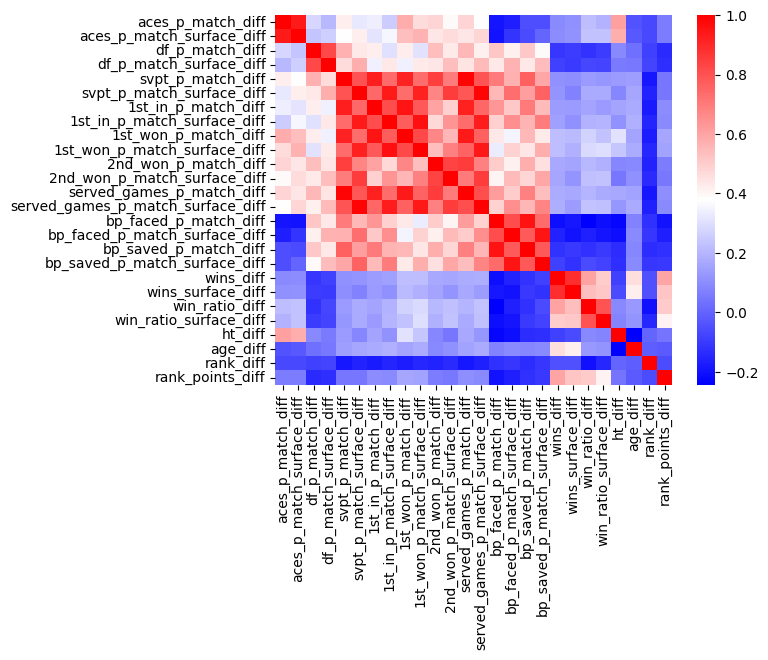

In [25]:
correlation_matrix = X_train.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

### Correlation Matrix

In [26]:
# converting correlation matrix into a df
corr_df = correlation_matrix.stack().reset_index()

# renaming columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# removing self-correlations
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

In [27]:
# computing absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# showing pairs of features
a = corr_df.sort_values(by="absolute_correlation", ascending=False)
a[a["absolute_correlation"] > 0.9]

,feature_1,feature_2,correlation,absolute_correlation
316,served_games_p_match_diff,svpt_p_match_diff,0.988232,0.988232
116,svpt_p_match_diff,served_games_p_match_diff,0.988232,0.988232
143,svpt_p_match_surface_diff,served_games_p_match_surface_diff,0.985887,0.985887
343,served_games_p_match_surface_diff,svpt_p_match_surface_diff,0.985887,0.985887
191,1st_in_p_match_surface_diff,1st_won_p_match_surface_diff,0.959674,0.959674
241,1st_won_p_match_surface_diff,1st_in_p_match_surface_diff,0.959674,0.959674
380,bp_faced_p_match_diff,bp_saved_p_match_diff,0.953176,0.953176
430,bp_saved_p_match_diff,bp_faced_p_match_diff,0.953176,0.953176
214,1st_won_p_match_diff,1st_in_p_match_diff,0.950713,0.950713
164,1st_in_p_match_diff,1st_won_p_match_diff,0.950713,0.950713


In [28]:
# cols_to_drop = ["served_games_p_match_diff", "served_games_p_match_surface_diff"]

# Model

## CV

In [29]:
# instantiating model
log_reg = LogisticRegression(max_iter = 1000)

# cross_val
cv_results = cross_validate(log_reg, X_train, y_train.squeeze(), cv = 5) # converting df to serie so i don't get the annoying warning

In [30]:
cv_results

{'fit_time': array([2.2718854 , 1.94018173, 1.07347608, 0.57687283, 0.79396558]),
 'score_time': array([0.00868678, 0.00508666, 0.00480723, 0.00501919, 0.00628304]),
 'test_score': array([0.70268139, 0.66719243, 0.69060773, 0.69850039, 0.6890292 ])}

## Evaluation with test set

In [35]:
# instantiating model
log_reg = LogisticRegression(max_iter = 1000)

# training
log_reg.fit(X_train, y_train.squeeze())

# evaluating
log_reg.score(X_test,y_test)

0.7011409642988591

### Plots of features vs probabilities

In [36]:
X_train.columns

Index(['aces_p_match_diff', 'aces_p_match_surface_diff', 'df_p_match_diff',
       'df_p_match_surface_diff', 'svpt_p_match_diff',
       'svpt_p_match_surface_diff', '1st_in_p_match_diff',
       '1st_in_p_match_surface_diff', '1st_won_p_match_diff',
       '1st_won_p_match_surface_diff', '2nd_won_p_match_diff',
       '2nd_won_p_match_surface_diff', 'served_games_p_match_diff',
       'served_games_p_match_surface_diff', 'bp_faced_p_match_diff',
       'bp_faced_p_match_surface_diff', 'bp_saved_p_match_diff',
       'bp_saved_p_match_surface_diff', 'wins_diff', 'wins_surface_diff',
       'win_ratio_diff', 'win_ratio_surface_diff', 'ht_diff', 'age_diff',
       'rank_diff', 'rank_points_diff'],
      dtype='object')

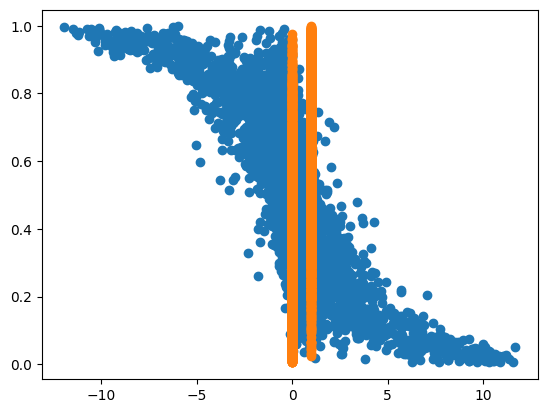

In [61]:
probabilities = log_reg.predict_proba(X_train)[:, 1]
feature_values = X_train["rank_points_diff"]

plt.scatter(feature_values, probabilities)
# plt.xlim(-5,5)

## Feature Permutation

In [32]:
# performing permutation
permutation_score = permutation_importance(log_reg, X_train, y_train, n_repeats=10)

# unstacking results showing the decrease in performance after shuffling
importance_df = pd.DataFrame(np.vstack((X_train.columns,
                                        permutation_score.importances_mean)).T)
importance_df.columns=['feature','score decrease']

# showing features' importance
importance_df.sort_values(by="score decrease", ascending=False)

,feature,score decrease
12,served_games_p_match_diff,0.086492
7,1st_in_p_match_surface_diff,0.081584
14,bp_faced_p_match_diff,0.072432
4,svpt_p_match_diff,0.064037
25,rank_points_diff,0.03661
6,1st_in_p_match_diff,0.03549
5,svpt_p_match_surface_diff,0.034038
11,2nd_won_p_match_surface_diff,0.027931
10,2nd_won_p_match_diff,0.0267
17,bp_saved_p_match_surface_diff,0.02629


## Learning Curves

In [33]:
# joining X_train and X_test to feed to the learning curves algorithm
X_new = pd.concat([X_train, X_test]).reset_index(drop = True)
y_new = pd.concat([y_train, y_test]).reset_index(drop = True)

# spliting in train sizes up to 70% of the total data
train_sizes = [round(coef*len(X_new)/100) for coef in range(1,72,10)]

# getting scores, sizes and test scores
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LogisticRegression(), X=X_new, y=y_new.squeeze(), train_sizes=train_sizes, cv=5)

# means of cv train and test
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

/home/stkarydasphys/.pyenv/versions/Tennis_Predictor/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/stkarydasphys/.pyenv/versions/Tennis_Predictor/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

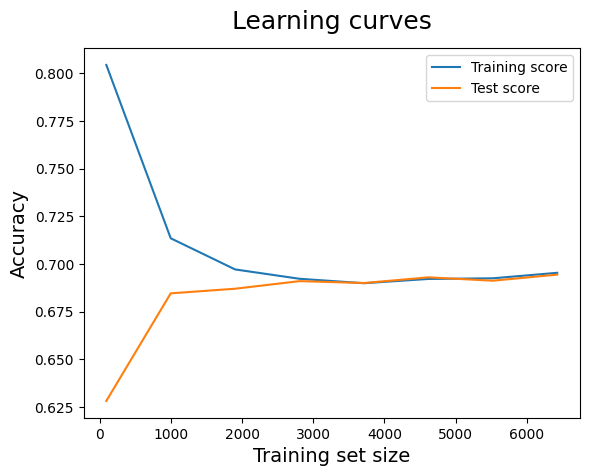

In [34]:
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()